# Hands On - Chapter 03 - Regularization and Model Selection

## Polynomial Regression

you can use a linear model to fit nonlinear data: 
* A simple way to do this is to add powers of each feature as new features, then train a linear model on this extended set of features. 

This technique is called *Polynomial Regression*.

Let us generate some nonlinear data, based on a simple quadratic equation (such as in $y = ax^2 + bx + c$ form) with some noise as follows:

In [15]:
import numpy as np
np.random.seed(42)

In [16]:
N = 100
X = 6 * np.random.rand(N, 1) - 3 # Range of X: from -3 to +3.
X

array([[-0.75275929],
       [ 2.70428584],
       [ 1.39196365],
       [ 0.59195091],
       [-2.06388816],
       [-2.06403288],
       [-2.65149833],
       [ 2.19705687],
       [ 0.60669007],
       [ 1.24843547],
       [-2.87649303],
       [ 2.81945911],
       [ 1.99465584],
       [-1.72596534],
       [-1.9090502 ],
       [-1.89957294],
       [-1.17454654],
       [ 0.14853859],
       [-0.40832989],
       [-1.25262516],
       [ 0.67111737],
       [-2.16303684],
       [-1.24713211],
       [-0.80182894],
       [-0.26358009],
       [ 1.71105577],
       [-1.80195731],
       [ 0.08540663],
       [ 0.55448741],
       [-2.72129752],
       [ 0.64526911],
       [-1.97685526],
       [-2.60969044],
       [ 2.69331322],
       [ 2.7937922 ],
       [ 1.85038409],
       [-1.17231738],
       [-2.41396732],
       [ 1.10539816],
       [-0.35908504],
       [-2.26777059],
       [-0.02893854],
       [-2.79366887],
       [ 2.45592241],
       [-1.44732011],
       [ 0

In [17]:
y = 0.5 * X**2 + X + 2 + np.random.randn(N, 1)

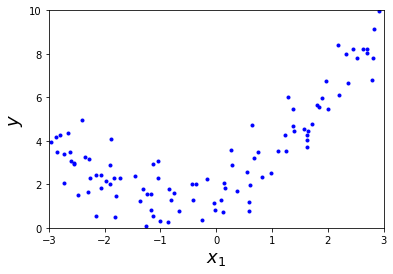

In [18]:
# To plot pretty figures
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=90, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

**Figure 1**: Generated nonlinear and noisy dataset.

Clearly, a straight line will never fit the above data properly. 
* So let us use Scikit-Learn’s `PolynomialFeatures` class to transform our training data, adding the square (seconddegree polynomial) of each feature in the training set as a new feature (in this case there is just one feature):

In [19]:
from sklearn.preprocessing import PolynomialFeatures
                                           # include_bias = True will insert X0=1
poly_features = PolynomialFeatures(degree=2, include_bias = False) 

In [20]:
X_poly = poly_features.fit_transform(X)

In [21]:
X_poly

array([[-7.52759287e-01,  5.66646544e-01],
       [ 2.70428584e+00,  7.31316190e+00],
       [ 1.39196365e+00,  1.93756281e+00],
       [ 5.91950905e-01,  3.50405874e-01],
       [-2.06388816e+00,  4.25963433e+00],
       [-2.06403288e+00,  4.26023172e+00],
       [-2.65149833e+00,  7.03044338e+00],
       [ 2.19705687e+00,  4.82705891e+00],
       [ 6.06690070e-01,  3.68072842e-01],
       [ 1.24843547e+00,  1.55859111e+00],
       [-2.87649303e+00,  8.27421218e+00],
       [ 2.81945911e+00,  7.94934969e+00],
       [ 1.99465584e+00,  3.97865194e+00],
       [-1.72596534e+00,  2.97895634e+00],
       [-1.90905020e+00,  3.64447265e+00],
       [-1.89957294e+00,  3.60837736e+00],
       [-1.17454654e+00,  1.37955958e+00],
       [ 1.48538590e-01,  2.20637127e-02],
       [-4.08329888e-01,  1.66733298e-01],
       [-1.25262516e+00,  1.56906979e+00],
       [ 6.71117368e-01,  4.50398522e-01],
       [-2.16303684e+00,  4.67872835e+00],
       [-1.24713211e+00,  1.55533850e+00],
       [-8.

In [22]:
X[0]

array([-0.75275929])

In [23]:
X_poly[0]

array([-0.75275929,  0.56664654])

* `X_poly` now contains the original feature of X plus the square of this feature. 
* Now, we can fit a `LinearRegression` model to this extended training data (Figure 2):

In [24]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

The model estimates $\hat{y} = 0.564x_1^2 + 0.933x_1 + 1.781$ when in fact the original function was $y = 0.5x_1^2 + 1.0x_1 + 2.0 + $ Gaussian noise.

In [25]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
X_new_poly

array([[-3.00000000e+00,  9.00000000e+00],
       [-2.93939394e+00,  8.64003673e+00],
       [-2.87878788e+00,  8.28741965e+00],
       [-2.81818182e+00,  7.94214876e+00],
       [-2.75757576e+00,  7.60422406e+00],
       [-2.69696970e+00,  7.27364555e+00],
       [-2.63636364e+00,  6.95041322e+00],
       [-2.57575758e+00,  6.63452709e+00],
       [-2.51515152e+00,  6.32598714e+00],
       [-2.45454545e+00,  6.02479339e+00],
       [-2.39393939e+00,  5.73094582e+00],
       [-2.33333333e+00,  5.44444444e+00],
       [-2.27272727e+00,  5.16528926e+00],
       [-2.21212121e+00,  4.89348026e+00],
       [-2.15151515e+00,  4.62901745e+00],
       [-2.09090909e+00,  4.37190083e+00],
       [-2.03030303e+00,  4.12213039e+00],
       [-1.96969697e+00,  3.87970615e+00],
       [-1.90909091e+00,  3.64462810e+00],
       [-1.84848485e+00,  3.41689624e+00],
       [-1.78787879e+00,  3.19651056e+00],
       [-1.72727273e+00,  2.98347107e+00],
       [-1.66666667e+00,  2.77777778e+00],
       [-1.

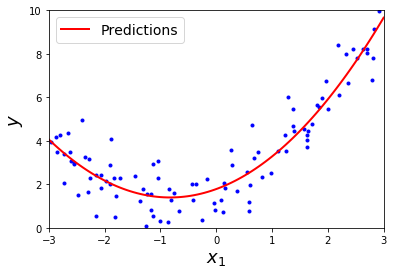

In [26]:
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=90, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

**Figure 2**: Polynomial Regression model predictions.

* Note that when there are multiple features, Polynomial Regression is capable of finding relationships between features (which is something a plain Linear Regression model cannot do). 

* This is made possible by the fact that `PolynomialFeatures` also adds all combinations of features up to the given degree. 

* For example, if there were two features a and b, `PolynomialFeatures` with `degree=3` would not only add the features $a^2, a^3, b^2$, and $b^3$, but also the combinations $ab, a^2b$, and $ab^2$.


* `PolynomialFeatures(degree=d)` transforms an array containing $n$ features into an array containing $(n + d)! / d!n!$ features (including the original feature(s) and the bias term), where $n!$ is the factorial of $n$, equal to $1 × 2 × 3 × ... × n $. **Beware of the combinatorial explosion of the number of features!**

If we perform high-degree Polynomial Regression, we will likely fit the training data much better than with plain Linear Regression. 

* For example, Figure 3 applies a 300-degree polynomial model to the preceding training data, and compares the result with a pure linear model and a quadratic model (second-degree polynomial). 

* Notice how the 300-degree polynomial model wiggles around to get as close as possible to the training instances.

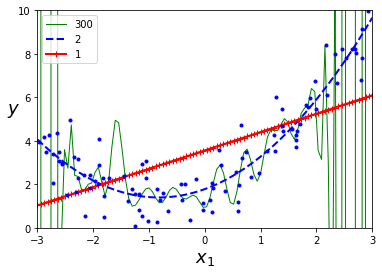

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False) 
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()    
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

**Figure 3**: High-degree Polynomial Regression.

* The high-degree Polynomial Regression model is severely overfitting (see **Figure 3**) the training data, while the linear model is underfitting it. 
* The model that will generalize best in this case is the quadratic model, which makes sense because the data was generated using a quadratic model. 

However, in general you won’t know what function generated the data. Thus, we used cross-validation to get an estimate of a model’s generalization performance.
 - If a model performs well on the training data but generalizes poorly according to the cross-validation metrics, then the model is overfitting. 
 - If it performs poorly on both, then it is underfitting. 

This is one way to tell when a model is too simple or too complex. 


Another way to tell is to look at the learning curves:
- these are plots of the model’s performance on the training set and the validation set as a function of the training set size (or the training iteration). 
- To generate the plots, train the model several times on different sized subsets of the training set.

The following code defines a function that, given some training data, plots the learning curves of a model:

In [28]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for N in range(1, len(X_train)):   # use 1 datam, then 2 data, 3 data, ..., All data
        model.fit(X_train[:N], y_train[:N])
        y_train_predict = model.predict(X_train[:N])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:N], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   
    plt.xlabel("Training set size", fontsize=14) 
    plt.ylabel("RMSE", fontsize=14)              

Let us look at the learning curves of the plain Linear Regression model (a straight line;
see **Figure 4**):

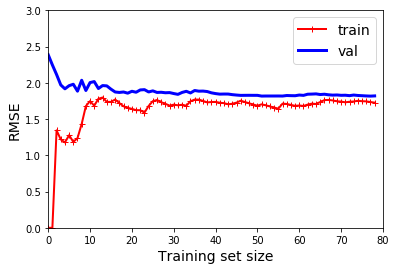

In [29]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.axis([0, 80, 0, 3])
plt.show()                                      

**Figure 4**: Learning curves.

This model (in **Figure 4**) is underfitting: 
- Look at the performance on the training data: when there are just one or two instances in the training set, the model can fit them perfectly, which is why the curve starts at zero. 
- But as new instances are added to the training set, it becomes impossible for the model to fit the training data perfectly, both because the data is noisy and because it is not linear at all. 
- So the error on the training data goes up until it reaches a plateau, at which point adding new instances to the training set doesn’t make the average error much better or worse. 
- Now let us look at the performance of the model on the validation data. When the model is trained on very few training instances, it is incapable of generalizing properly, which is why the validation error is initially quite big.
- Then, as the model is shown more training examples, it learns, and thus the validation error slowly goes down. However, once again a straight line cannot do a good job modeling the data, so the error ends up at a plateau, very close to the other curve.
- These learning curves are typical of a model that’s underfitting. Both curves have reached a plateau; they are close and fairly high.

**If your model is underfitting the training data, adding more training examples will not help. You need to use a more complex model or come up with better features.**

Now, let us look at the learning curves of a 10th-degree polynomial model on the same data (**Figure 5**):

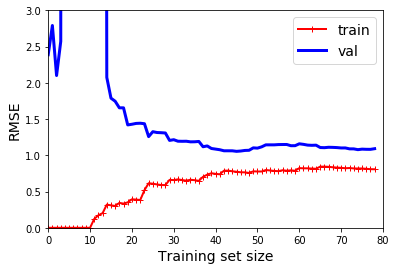

In [30]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])           
plt.show()                        

**Figure 5**: Learning curves for the 10th-degree polynomial model.

These learning curves look a bit like the previous ones, but there are two very important
differences:

- The error on the training data is much lower than with the Linear Regression model.
- There is a gap between the curves. 
   - This means that the model performs significantly better on the training data than on the validation data, which is the hallmark of an overfitting model. 
- If we used a much larger training set, however, the two curves would continue to get closer.

**One way to improve an overfitting model is to feed it more training data until the validation error reaches the training error**.

## Regularized Models

A good way to reduce overfitting is to regularize the model (i.e., to constrain it): 
- the fewer degrees of freedom it has, the harder it will be for it to overfit the data. 
- A simple way to regularize a polynomial model is to reduce the number of polynomial degrees. 
- Regularization is typically achieved by constraining the weights of the model.

 We will now look at 
 - Ridge Regression, 
 - Lasso Regression, and 
 - Elastic Net, 

which implement three different ways to constrain the weights:

In [31]:
np.random.seed(42)
N = 20
X = 3 * np.random.rand(N, 1)
y = 1 + 0.5 * X + np.random.randn(N, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

### Ridge Regression
* Ridge Regression (also called Tikhonov regularization) forces the learning algorithm to not only fit the data but also keep the model weights as small as possible. 
* Note that the regularization term should only be added to the cost function during training.
* Once the model is trained, you want to use the unregularized performance measure to evaluate the model’s performance.

**Note**: It is quite common for the cost function used during training to be
different from the performance measure used for testing. For example, classifiers are often trained using a cost function such as the log loss but evaluated using precision/recall.

It is important to scale the data (e.g., using a `StandardScaler`) before performing Ridge Regression, as it is sensitive to the scale of the input features. This is true of most regularized models.

**Figure 6** shows several Ridge models trained on some linear data using different $\lambda$
values: 
* On the left, plain Ridge models are used, leading to linear predictions.
* On the right, the data is first expanded using `PolynomialFeatures(degree=10)`, then it is scaled using a `StandardScaler`, and finally the Ridge models are applied to the resulting features: this is Polynomial Regression with Ridge regularization. 
* Note how increasing $\lambda$ leads to flatter (i.e., less extreme, more reasonable) predictions, thus reducing the model’s variance but increasing its bias.

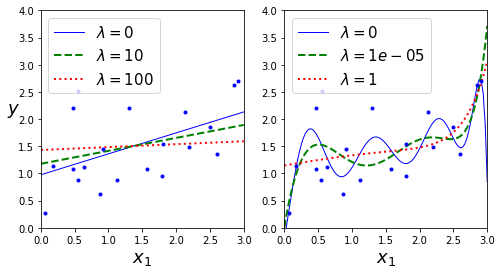

In [32]:
from sklearn.linear_model import Ridge

def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                    ("std_scaler", StandardScaler()),
                    ("regul_reg", model),
                ])
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label=r"$\lambda = {}$".format(alpha))
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 3, 0, 4])

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)
plt.show()

**Figure 6**: A linear model (left) and a polynomial model (right), both with various levels
of Ridge regularization.

As with Linear Regression, we can perform Ridge Regression either by computing a closed-form equation or by performing Gradient Descent.

Here is how to perform Ridge Regression with Scikit-Learn using a variant of closed-form (i.e., Normal Equation with regularization), that uses a matrix factorization technique by André Louis Cholesky solution:

In [33]:
from sklearn.linear_model import Ridge
                  # here parameter alpha is our lambda
ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42) 
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.55071465]])

We can use Stochastic Gradient Descent:

In [34]:
from sklearn.linear_model import SGDRegressor
                     # penalty = 'l2', 'l1', or 'elasticnet', ... & l2=> Ridge
sgd_reg = SGDRegressor(penalty="l2", max_iter=1000, tol=1e-3, random_state=42)
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([1.47012588])

Alternatively, we can use the Ridge class with the "sag" solver. Stochastic Average GD is a variant of Stochastic GD:

In [35]:
ridge_reg = Ridge(alpha=1, solver="sag", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.5507201]])

### Lasso Regression
Least Absolute Shrinkage and Selection Operator Regression (usually simply called Lasso Regression) is another regularized version of Linear Regression: just like Ridge Regression, it adds a regularization term to the cost function, but it uses the $l_1$ norm of the weight vector.

**Figure 8** shows the same thing as **Figure 7** but replaces Ridge models with Lasso models and uses smaller $\lambda$ values.

/home/wingate/.local/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.802867703827423, tolerance: 0.0009294783355207351
  positive)


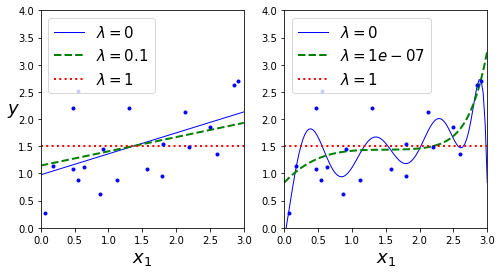

In [36]:
from sklearn.linear_model import Lasso

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0, 0.1, 1), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 10**-7, 1), random_state=42)
plt.show()

**Figure 8**: A linear model (left) and a polynomial model (right), both using various levels of Lasso regularization.

An important characteristic of Lasso Regression is that it tends to eliminate the weights of the least important features (i.e., set them to zero). 

* For example, the dashed line in the righthand plot in **Figure 8** (with $\lambda = 10^{-7}$) looks quadratic, and all the weights for the high-degree polynomial features are equal to zero. 

* In other words, Lasso Regression automatically performs feature selection and outputs a sparse model (i.e., with few nonzero feature weights).

Here is a small Scikit-Learn example using the `Lasso` class:

In [37]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([1.53788174])

Note that we could instead use `SGDRegressor(penalty="l1")`.

### Elastic Net
Elastic Net is a middle ground between Ridge Regression and Lasso Regression. 
* The regularization term is a simple mix of both Ridge and Lasso’s regularization terms,
and you can control the mix ratio r. 
* When r = 0, Elastic Net is equivalent to Ridge Regression, and 
* when r = 1, it is equivalent to Lasso Regression

The cost function of Elastic Net can be expressed as: Cost($\beta$)= MSE($\beta$)+ $r$ x Ridge + $\frac{(1-r)}{2} $ x Lasso. 

Here is a short example that uses Scikit-Learn’s `ElasticNet` (`l1_ratio` corresponds to the mix ratio $r$):

In [38]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([1.54333232])

### Early stopping 
A very different way to regularize iterative learning algorithms such as Gradient Descent is to stop training as soon as the validation error reaches a minimum. This is called *early stopping*.

In [39]:
np.random.seed(42)
N = 100
X = 6 * np.random.rand(N, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(N, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

Here is a basic implementation of early stopping:

In [40]:
from sklearn.base import clone

poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler())
    ])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)  # continues where it left off
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

Create the graph:

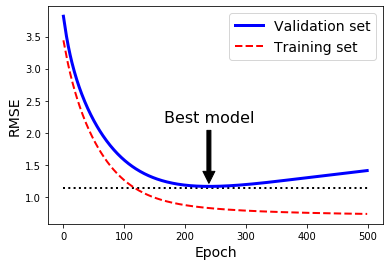

In [41]:
sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

n_epochs = 500
train_errors, val_errors = [], []
for epoch in range(n_epochs):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    train_errors.append(mean_squared_error(y_train, y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))

best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])

plt.annotate('Best model',
             xy=(best_epoch, best_val_rmse),
             xytext=(best_epoch, best_val_rmse + 1),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=16,
            )

best_val_rmse -= 0.03  # just to make the graph look better
plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation set")
plt.plot(np.sqrt(train_errors), "r--", linewidth=2, label="Training set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
plt.show()

**Figure 9**: Early stopping regularization.

**Figure 9** shows a complex model (in this case, a high-degree Polynomial Regression model) being trained with Batch Gradient Descent. 

* As the epochs go by the algorithm learns, and its prediction error (RMSE) on the training set goes down, along with its prediction error on the validation set. 
* After a while though, the validation error stops decreasing and starts to go back up. This indicates that the model has started to overfit the training data. 
* With early stopping you just stop training as soon as the validation error reaches the minimum. 


Early stopping is such a simple and efficient regularization technique that it was called a  “beautiful free lunch” by Geoffrey Hinton.

In [42]:
best_epoch, best_model

(239,
 SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
              eta0=0.0005, fit_intercept=True, l1_ratio=0.15,
              learning_rate='constant', loss='squared_loss', max_iter=1,
              n_iter_no_change=5, penalty=None, power_t=0.25, random_state=42,
              shuffle=True, tol=-inf, validation_fraction=0.1, verbose=0,
              warm_start=True))

In [43]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [44]:
t1a, t1b, t2a, t2b = -1, 3, -1.5, 1.5

t1s = np.linspace(t1a, t1b, 500)
t2s = np.linspace(t2a, t2b, 500)
t1, t2 = np.meshgrid(t1s, t2s)
T = np.c_[t1.ravel(), t2.ravel()]
Xr = np.array([[1, 1], [1, -1], [1, 0.5]])
yr = 2 * Xr[:, :1] + 0.5 * Xr[:, 1:]

J = (1/len(Xr) * np.sum((T.dot(Xr.T) - yr.T)**2, axis=1)).reshape(t1.shape)

N1 = np.linalg.norm(T, ord=1, axis=1).reshape(t1.shape)
N2 = np.linalg.norm(T, ord=2, axis=1).reshape(t1.shape)

t_min_idx = np.unravel_index(np.argmin(J), J.shape)
t1_min, t2_min = t1[t_min_idx], t2[t_min_idx]

t_init = np.array([[0.25], [-1]])

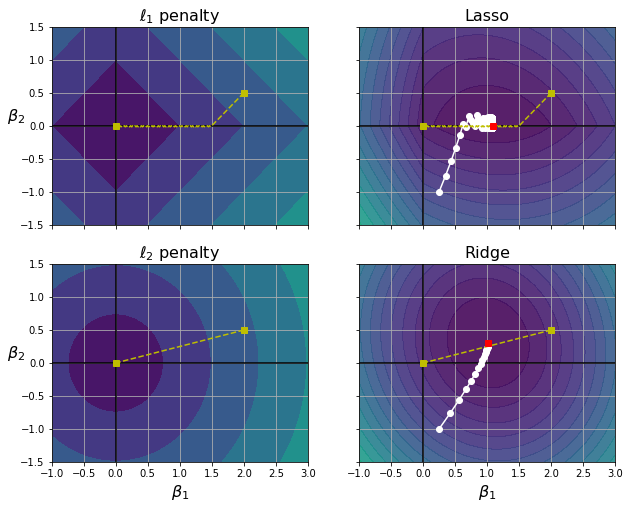

In [45]:
def bgd_path(beta, X, y, l1, l2, core = 1, eta = 0.05, n_iterations = 200):
    path = [beta]
    for iteration in range(n_iterations):
        gradients = core * 2/len(X) * X.T.dot(X.dot(beta) - y) + l1 * np.sign(beta) + l2 * beta
        beta = beta - eta * gradients
        path.append(beta)
    return np.array(path)

fig, axes = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(10.1, 8))
for i, N, l1, l2, title in ((0, N1, 2., 0, "Lasso"), (1, N2, 0,  2., "Ridge")):
    JR = J + l1 * N1 + l2 * 0.5 * N2**2
    
    tr_min_idx = np.unravel_index(np.argmin(JR), JR.shape)
    t1r_min, t2r_min = t1[tr_min_idx], t2[tr_min_idx]

    levelsJ=(np.exp(np.linspace(0, 1, 20)) - 1) * (np.max(J) - np.min(J)) + np.min(J)
    levelsJR=(np.exp(np.linspace(0, 1, 20)) - 1) * (np.max(JR) - np.min(JR)) + np.min(JR)
    levelsN=np.linspace(0, np.max(N), 10)
    
    path_J = bgd_path(t_init, Xr, yr, l1=0, l2=0)
    path_JR = bgd_path(t_init, Xr, yr, l1, l2)
    path_N = bgd_path(np.array([[2.0], [0.5]]), Xr, yr, np.sign(l1)/3, np.sign(l2), core=0)

    ax = axes[i, 0]
    ax.grid(True)
    ax.axhline(y=0, color='k')
    ax.axvline(x=0, color='k')
    ax.contourf(t1, t2, N / 2., levels=levelsN)
    ax.plot(path_N[:, 0], path_N[:, 1], "y--")
    ax.plot(0, 0, "ys")
    ax.plot(t1_min, t2_min, "ys")
    ax.set_title(r"$\ell_{}$ penalty".format(i + 1), fontsize=16)
    ax.axis([t1a, t1b, t2a, t2b])
    if i == 1:
        ax.set_xlabel(r"$\beta_1$", fontsize=16)
    ax.set_ylabel(r"$\beta_2$", fontsize=16, rotation=0)

    ax = axes[i, 1]
    ax.grid(True)
    ax.axhline(y=0, color='k')
    ax.axvline(x=0, color='k')
    ax.contourf(t1, t2, JR, levels=levelsJR, alpha=0.9)
    ax.plot(path_JR[:, 0], path_JR[:, 1], "w-o")
    ax.plot(path_N[:, 0], path_N[:, 1], "y--")
    ax.plot(0, 0, "ys")
    ax.plot(t1_min, t2_min, "ys")
    ax.plot(t1r_min, t2r_min, "rs")
    ax.set_title(title, fontsize=16)
    ax.axis([t1a, t1b, t2a, t2b])
    if i == 1:
        ax.set_xlabel(r"$\beta_1$", fontsize=16)


plt.show()

**Figure 10**: Lasso versus Ridge regularization.

In Figure 10, the axes represent two model parameters, and the background contours represent different loss functions. 

**Lasso**: In the top-left plot, the contours represent the ℓ1 loss $(|\beta_1| + |\beta_2|)$, which drops linearly as you get closer to any axis: 

* For example, if you initialize the model parameters to $\beta_1$ = 2 and $\beta_2$ = 0.5, running Gradient Descent will decrement both parameters equally (as represented by the dashed yellow line); therefore $\beta_2$ will reach 0 first (since it was closer to 0 to begin with). After that, Gradient Descent will roll down the gutter until it reaches $\beta_1$ = 0 (with a bit of bouncing around, since the gradients of ℓ1 never get close to 0: they are either –1 or 1 for each parameter). 

* To avoid Gradient Descent from bouncing around the optimum at the end when using Lasso, you need to gradually reduce the learning rate during training (it will still bounce around the optimum,but the steps will get smaller and smaller, so it will converge).


In the topright plot, the contours represent Lasso’s cost function (i.e., an MSE cost function plus an ℓ1 loss):

* The small white circles show the path that Gradient Descent takes to optimize some model parameters that were initialized around $\beta_1$ = 0.25 and $\beta_2$ = –1: 

* notice once again how the path quickly reaches $\beta_2$ = 0, then rolls down the gutter and ends up bouncing around the global optimum (represented by the red square). 

* If we increased $\lambda$, the global optimum would move left along the dashed yellow line, while if we decreased $\lambda$, the global optimum would move right (in this example, the optimal parameters for the unregularized MSE are $\beta_1$ = 2 and $\beta_2$ = 0.5).


**Ridge Regression**: The two bottom plots show the same thing but with an ℓ2 penalty instead. 
* In the bottom-left plot, you can see that the ℓ2 loss decreases with the distance to the origin, so Gradient Descent just takes a straight path toward that point. 

* In the bottom-right plot, the contours represent Ridge Regression’s cost function (i.e., an MSE cost function plus an ℓ2 loss). 

* There are two main differences with Lasso. 
     * First, the gradients get smaller as the parameters approach the global optimum, so Gradient Descent naturally slows down, which helps convergence (as there is no bouncing around). 
     * Second, the optimal parameters (represented by the red square) get closer and closer to the origin when you increase $\lambda$, but they never get eliminated entirely.